Step 1: Read the dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
movies = pd.read_csv("fandango_score_comparison.csv")

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

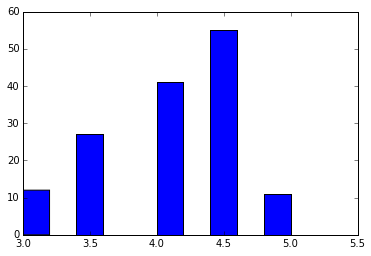

In [27]:
plt.hist(movies["Fandango_Stars"])

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

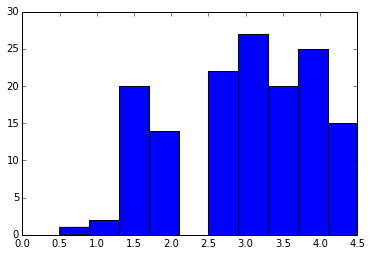

In [28]:
plt.hist(movies["Metacritic_norm_round"])

In [29]:
f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.08904109589
2.97260273973
0.540385977979
0.990960561374
4.0
3.0


There is a difference in the way ratings for metacritic and fandango are arrived at. Metacritic seems more credible. 
For Fandango, there is a conflict of interest. As it also sells movie tickets, a higher rating for any movie is always better for them.

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the mean. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.
Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.
Fandango ratings in general appear to be higher than metacritic ratings.
These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

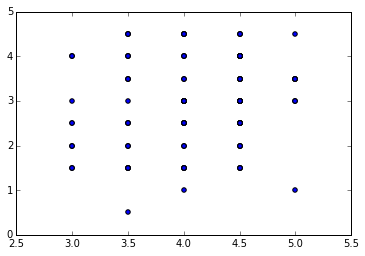

In [30]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.show()

In [31]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"]-movies["Fandango_Stars"])

In [32]:
movies.sort(columns="fm_diff", ascending = False).head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.9,4.20,...,1,4,1.0,2.5,2.5,31,3136,1793,0.5,4
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.0,4.05,...,1,4,1.5,3.0,3.5,38,5927,811,0.2,3


Calculating correlation

In [33]:
from scipy.stats import pearsonr

In [34]:
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r_value

0.17844919073895918

Fandango and Metacritic correlation:
The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [36]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(
    movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [37]:
# Predicting Fandango rating with a Metacritic rating of 3.0
rating = 3.0 * slope + intercept
rating

4.0917071528212041

In [39]:
rating2 = 4 * slope + intercept
rating2

4.1890182307951322

In [45]:
x = [3.0, 4.0]
y = [i*slope + intercept for i in x]
y

[4.0917071528212041, 4.1890182307951322]

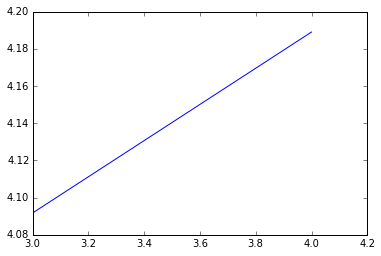

In [50]:
plt.plot(x,y)
plt.show()